In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

from matplotlib.pylab import rcParams
rcParams['figure.figsize']=20,10

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))

from keras.models import Sequential
from keras.layers import LSTM,Dropout,Dense



In [2]:
df=pd.read_csv("Historical_Data/stock2.csv")
df.head()

,id,stock_id,date,close,open,high,low
0,1,1,2021-06-28,688.72,671.64,694.70,670.32
1,2,1,2021-06-25,671.87,689.58,693.81,668.70
2,3,1,2021-06-24,679.82,674.99,697.62,667.61
3,4,1,2021-06-23,656.57,632.00,657.20,630.04
4,5,1,2021-06-22,623.71,618.25,628.57,615.50


In [3]:
df["date"]=pd.to_datetime(df.date,format="%Y-%m-%d")
df.index=df['date']


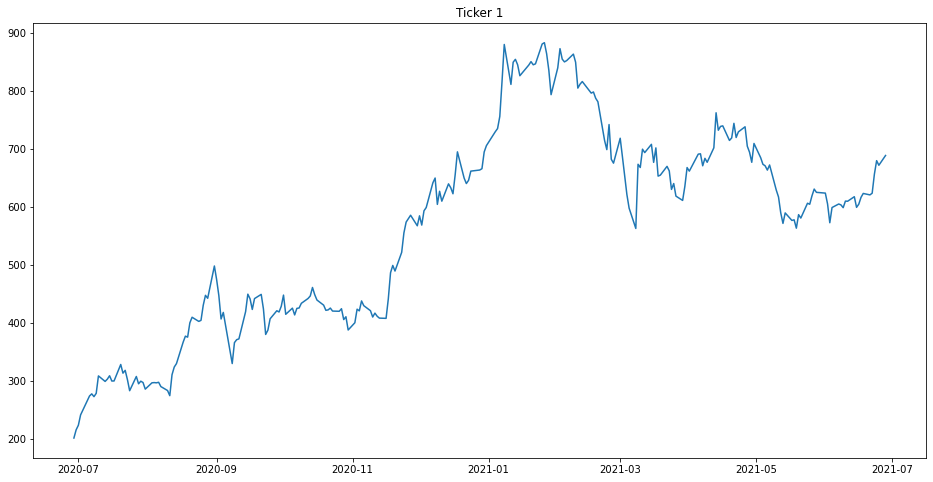

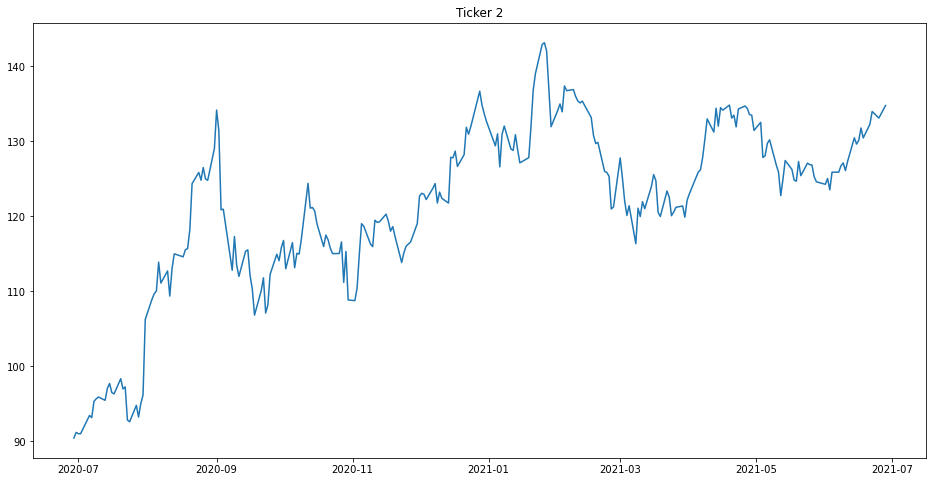

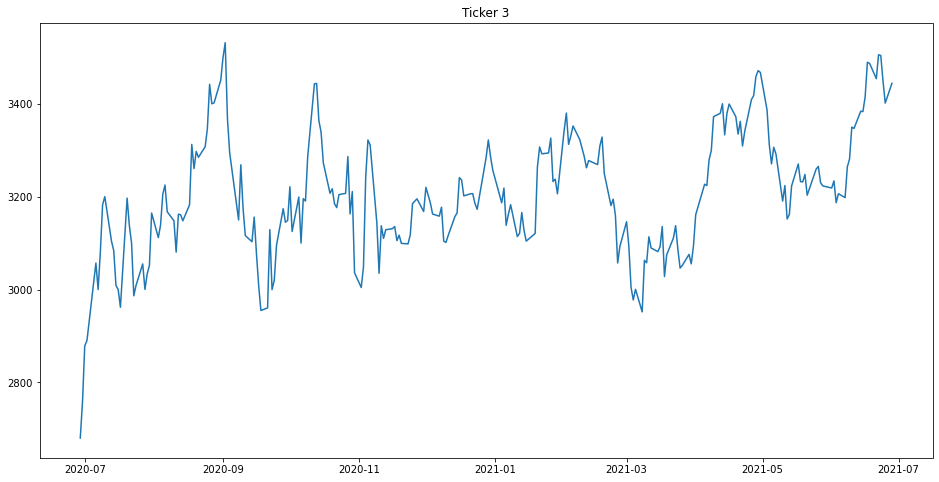

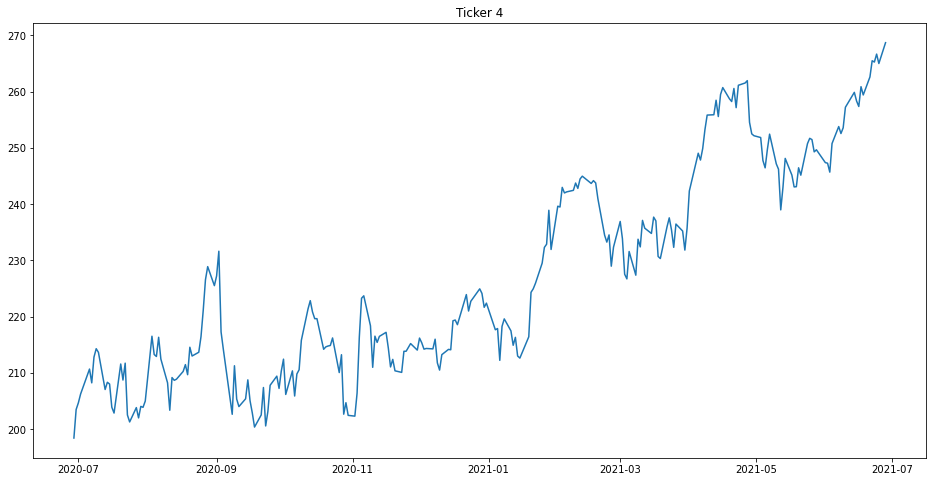

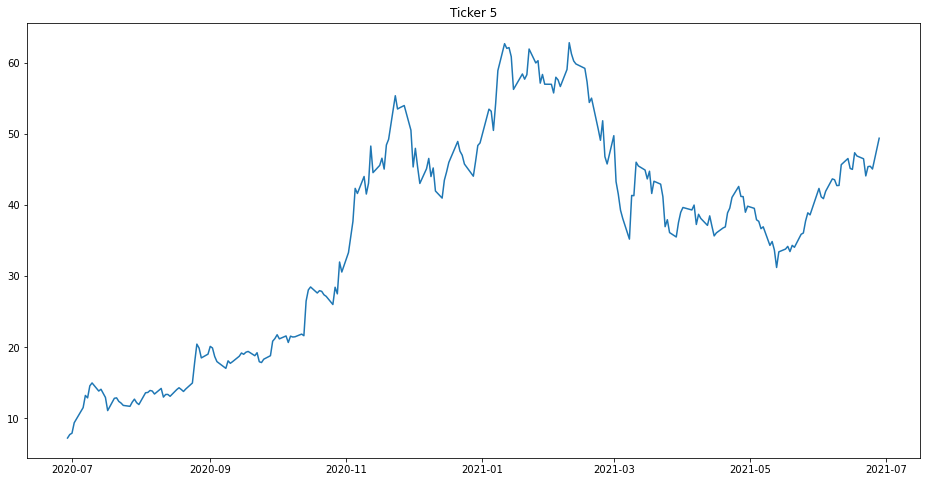

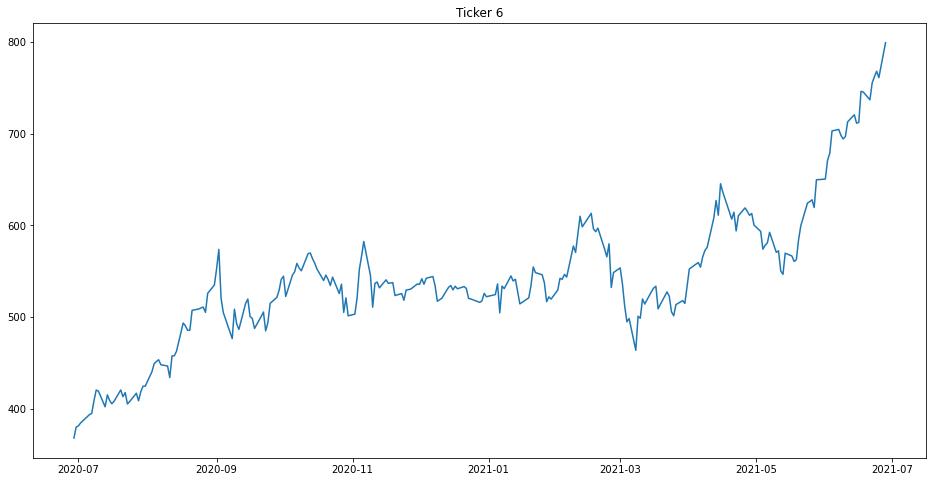

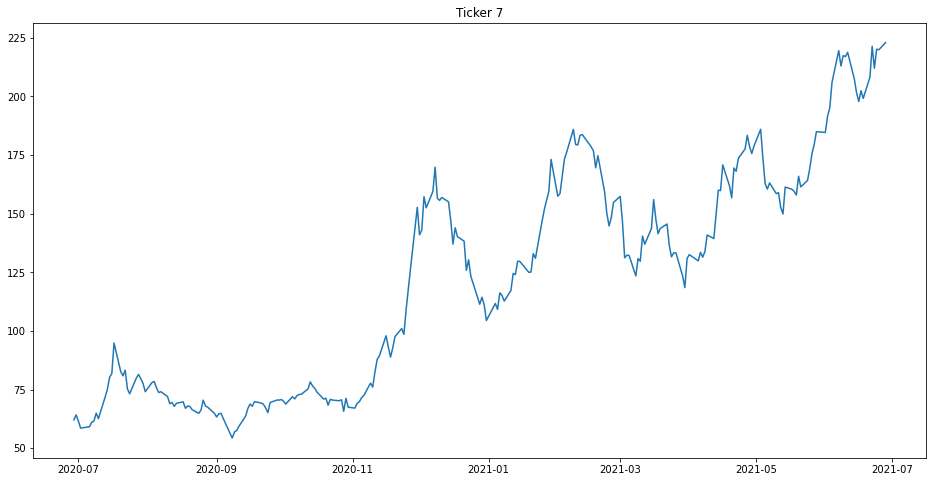

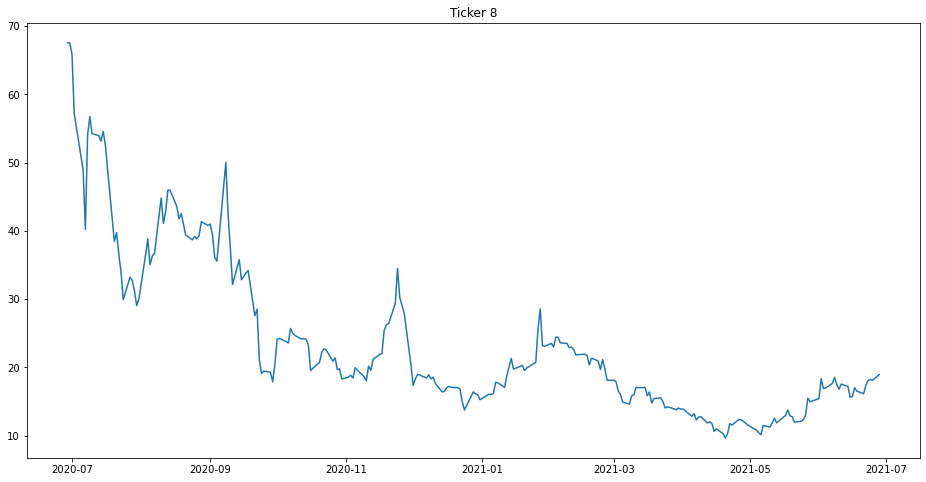

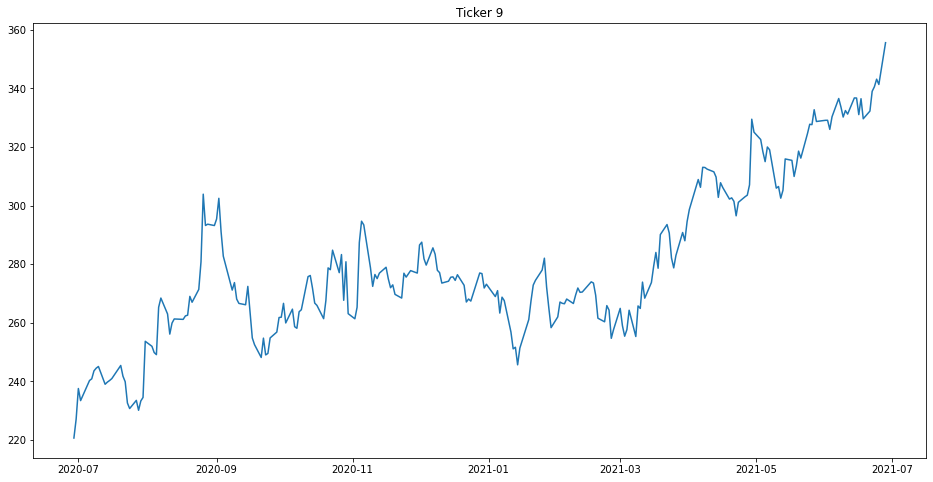

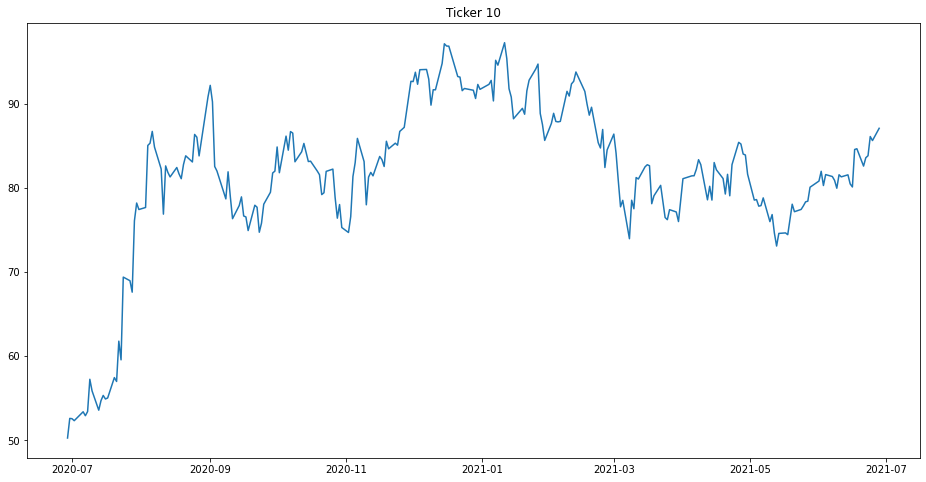

In [4]:
#For loop plotting Closing Prices
for tick in range(1,11):
    temp_df = df.loc[df['stock_id']==tick]
    plt.figure(figsize=(16,8))
    plt.plot(temp_df["close"],label='Close Price history')
    plt.title(f"Ticker {tick}")


In [5]:
#sort data
data=df.sort_index(ascending=True,axis=0)
new_dataset=pd.DataFrame(index=range(0,len(df)),columns=['date','close'])

for i in range(0,len(data)):
    new_dataset["date"][i]=data['date'][i]
    new_dataset["close"][i]=data["close"][i]

In [6]:
df['date'] = df['date'].astype(str)

new_dataset.columns

Index(['date', 'close'], dtype='object')

In [7]:
#Normalize
new_dataset.index=new_dataset.date
new_dataset.drop('date',axis=1,inplace=True)


In [9]:
final_dataset=new_dataset.values

train_data=final_dataset[0:1260,:]
valid_data=final_dataset[1260,:]

scaler=MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(final_dataset)

x_train_data,y_train_data=[],[]

for i in range(60,len(train_data)):
    x_train_data.append(scaled_data[i-60:i,0])
    y_train_data.append(scaled_data[i,0])
    
x_train_data,y_train_data=np.array(x_train_data),np.array(y_train_data)

x_train_data=np.reshape(x_train_data,(x_train_data.shape[0],x_train_data.shape[1],1))

In [10]:
lstm_model=Sequential()
lstm_model.add(LSTM(units=50,return_sequences=True,input_shape=(x_train_data.shape[1],1)))
lstm_model.add(LSTM(units=50))
lstm_model.add(Dense(1))




lstm_model.compile(loss='mean_squared_error',optimizer='adam')
lstm_model.fit(x_train_data,y_train_data,epochs=1,batch_size=1,verbose=2)

inputs_data=new_dataset[len(new_dataset)-len(valid_data)-60:].values
inputs_data=inputs_data.reshape(-1,1)
inputs_data=scaler.transform(inputs_data)


1200/1200 - 27s - loss: 0.0667


In [14]:
X_test=[]
for i in range(60,inputs_data.shape[0]):
    X_test.append(inputs_data[i-60:i,0])
X_test=np.array(X_test)

X_test=np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
closing_price=lstm_model.predict(X_test)
closing_price=scaler.inverse_transform(closing_price)


In [15]:
lstm_model.save("saved_lstm_model.h5")

In [17]:
train_data=new_dataset[:1]
valid_data=new_dataset[1:]
valid_data['Predictions']=prediction_closing
plt.plot(train_data["close"])
plt.plot(valid_data[['close',"predictions"]])

NameError: name 'prediction_closing' is not defined